In [1]:
import pandas as pd
import io

# The synthetic data from our previous step

df = pd.read_csv("procrastination_big_data.csv")

# Let's inspect the data
print("Initial Data Info:")
df.info()

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Actual_Start_Time        2000 non-null   object 
 1   Task_Name                2000 non-null   object 
 2   Task_Category            2000 non-null   object 
 3   Estimated_Duration_Mins  2000 non-null   int64  
 4   Deadline_Date            2000 non-null   object 
 5   Planned_Start_Time       2000 non-null   object 
 6   Mood_Level_1_5           2000 non-null   int64  
 7   Energy_Level_1_5         2000 non-null   int64  
 8   Hours_of_Sleep           2000 non-null   float64
 9   Perceived_Enjoyment_1_5  2000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


In [2]:
# Convert date/time columns to datetime objects
df['Actual_Start_Time'] = pd.to_datetime(df['Actual_Start_Time'])
df['Planned_Start_Time'] = pd.to_datetime(df['Planned_Start_Time'])
df['Deadline_Date'] = pd.to_datetime(df['Deadline_Date'])

# Verify the changes
print("\nCorrected Data Info:")
df.info()


Corrected Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Actual_Start_Time        2000 non-null   datetime64[ns]
 1   Task_Name                2000 non-null   object        
 2   Task_Category            2000 non-null   object        
 3   Estimated_Duration_Mins  2000 non-null   int64         
 4   Deadline_Date            2000 non-null   datetime64[ns]
 5   Planned_Start_Time       2000 non-null   datetime64[ns]
 6   Mood_Level_1_5           2000 non-null   int64         
 7   Energy_Level_1_5         2000 non-null   int64         
 8   Hours_of_Sleep           2000 non-null   float64       
 9   Perceived_Enjoyment_1_5  2000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 156.4+ KB


In [3]:
## Step 3: Feature Engineering (Definitive Fix)

# 1. Create the Delay_Minutes Feature
df['Delay_Minutes'] = (df['Actual_Start_Time'] - df['Planned_Start_Time']).dt.total_seconds() / 60

# 2. Create the Target Variable: Procrastinated
PROCRASTINATION_THRESHOLD = 30
df['Procrastinated'] = (df['Delay_Minutes'] > PROCRASTINATION_THRESHOLD).astype(int)

# 3. Create Time-Based & Deadline Features
df['Day_of_Week'] = df['Actual_Start_Time'].dt.dayofweek
df['Hour_of_Day'] = df['Actual_Start_Time'].dt.hour

# The corrected and robust line for Deadline_Proximity_Days
df['Deadline_Proximity_Days'] = (df['Deadline_Date'] - df['Actual_Start_Time']).dt.days

# Final Check: Our Model-Ready Dataset
print("\nDataFrame with Engineered Features:")
print(df[['Task_Name', 'Delay_Minutes', 'Procrastinated', 'Day_of_Week', 'Hour_of_Day', 'Deadline_Proximity_Days']].head())


DataFrame with Engineered Features:
           Task_Name  Delay_Minutes  Procrastinated  Day_of_Week  Hour_of_Day  \
0        Cook dinner     110.108303               1            3           11   
1    Reply to emails     107.557659               1            3           14   
2  Revise DBMS notes      87.054628               1            3           16   
3   Prepare for quiz      86.057958               1            3           22   
4          Pay bills     109.098900               1            4            1   

   Deadline_Proximity_Days  
0                       17  
1                       29  
2                       10  
3                       12  
4                       18  


In [4]:
# Display the first few rows with our new features
print("\nDataFrame with Engineered Features:")
print(df[['Task_Name', 'Delay_Minutes', 'Procrastinated', 'Day_of_Week', 'Hour_of_Day', 'Deadline_Proximity_Days']].head())


DataFrame with Engineered Features:
           Task_Name  Delay_Minutes  Procrastinated  Day_of_Week  Hour_of_Day  \
0        Cook dinner     110.108303               1            3           11   
1    Reply to emails     107.557659               1            3           14   
2  Revise DBMS notes      87.054628               1            3           16   
3   Prepare for quiz      86.057958               1            3           22   
4          Pay bills     109.098900               1            4            1   

   Deadline_Proximity_Days  
0                       17  
1                       29  
2                       10  
3                       12  
4                       18  


In [5]:
#EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for our plots
sns.set_style("whitegrid")

Procrastinated
1    87.8
0    12.2
Name: proportion, dtype: float64


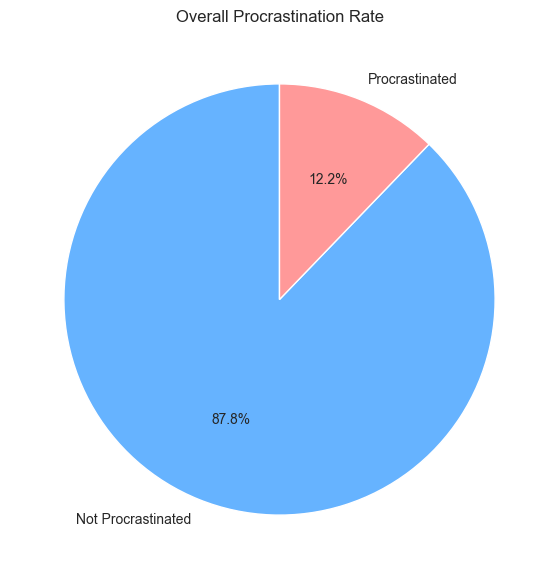

In [7]:
# Calculate the percentage
procrastination_rate = df['Procrastinated'].value_counts(normalize=True) * 100
print(procrastination_rate)

# Visualize with a pie chart
plt.figure(figsize=(7, 7))
plt.pie(procrastination_rate, labels=['Not Procrastinated', 'Procrastinated'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Overall Procrastination Rate')
plt.show()

C:\Users\shett\AppData\Local\Temp\ipykernel_11212\1454898058.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


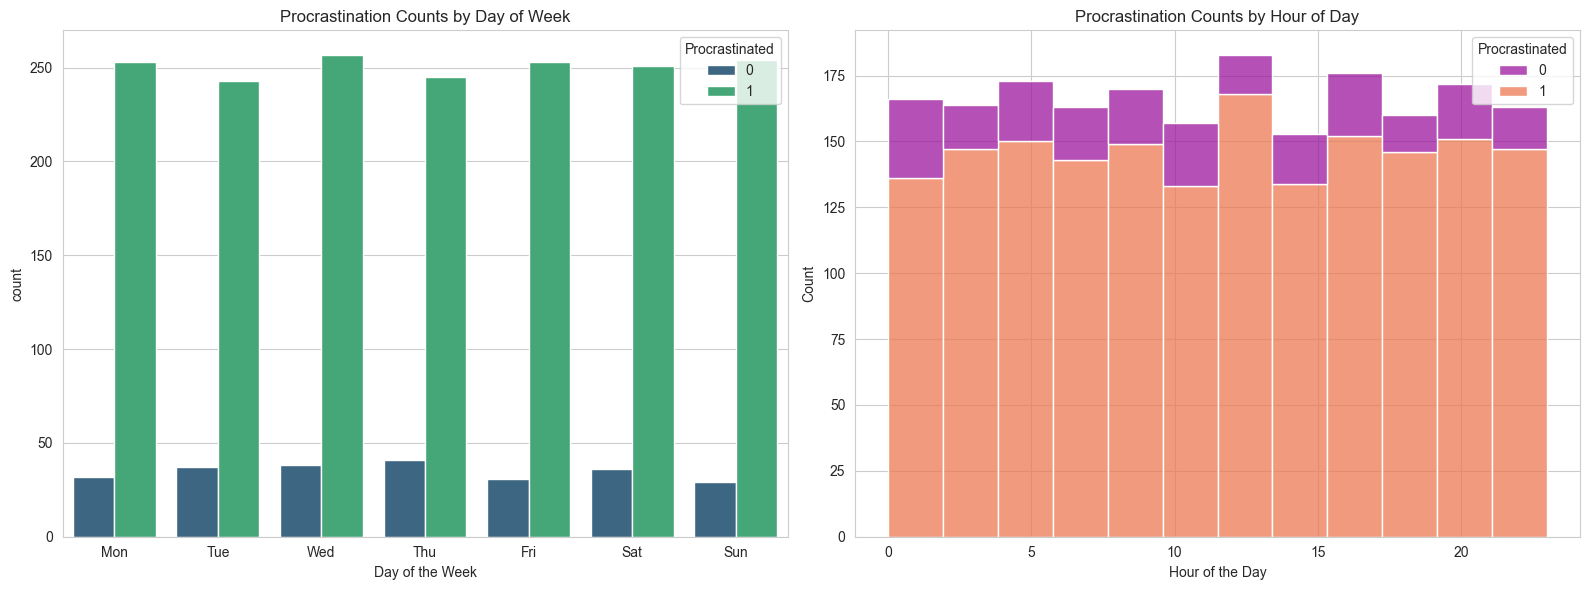

In [8]:
# Create a figure with two subplots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Procrastination by Day of the Week
sns.countplot(data=df, x='Day_of_Week', hue='Procrastinated', ax=ax[0], palette='viridis')
ax[0].set_title('Procrastination Counts by Day of Week')
ax[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[0].set_xlabel('Day of the Week')

# Plot 2: Procrastination by Hour of the Day
sns.histplot(data=df, x='Hour_of_Day', hue='Procrastinated', multiple='stack', ax=ax[1], palette='plasma', bins=12)
ax[1].set_title('Procrastination Counts by Hour of Day')
ax[1].set_xlabel('Hour of the Day')

plt.tight_layout()
plt.show()

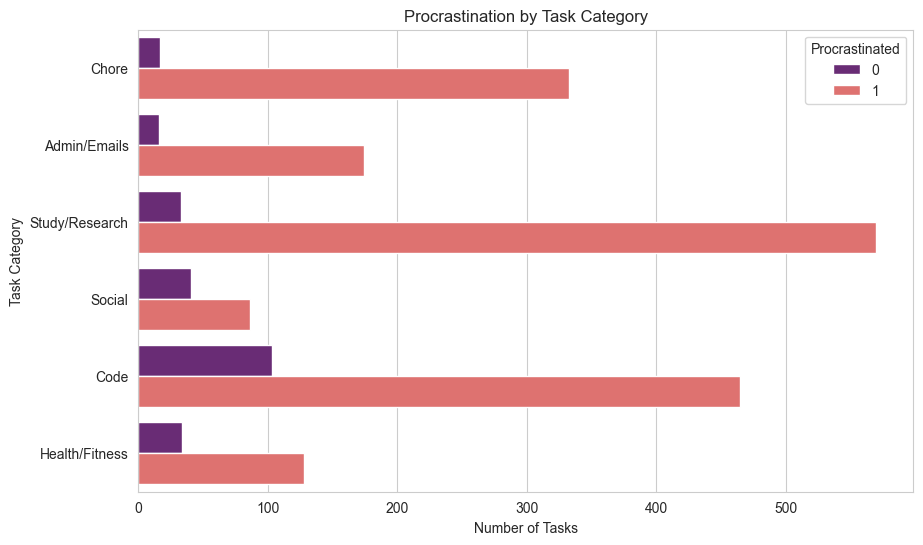

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Task_Category', hue='Procrastinated', palette='magma')
plt.title('Procrastination by Task Category')
plt.xlabel('Number of Tasks')
plt.ylabel('Task Category')
plt.show()

C:\Users\shett\AppData\Local\Temp\ipykernel_11212\2788687894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Procrastinated', y='Energy_Level_1_5', ax=ax[0], palette='coolwarm')
C:\Users\shett\AppData\Local\Temp\ipykernel_11212\2788687894.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Not Procrastinated', 'Procrastinated'])
C:\Users\shett\AppData\Local\Temp\ipykernel_11212\2788687894.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Procrastinated', y='Hours_of_Sleep', ax=ax[1], palette='coolwarm')
C:\Users\shett\AppData\Local\Temp\ipykernel_11212\

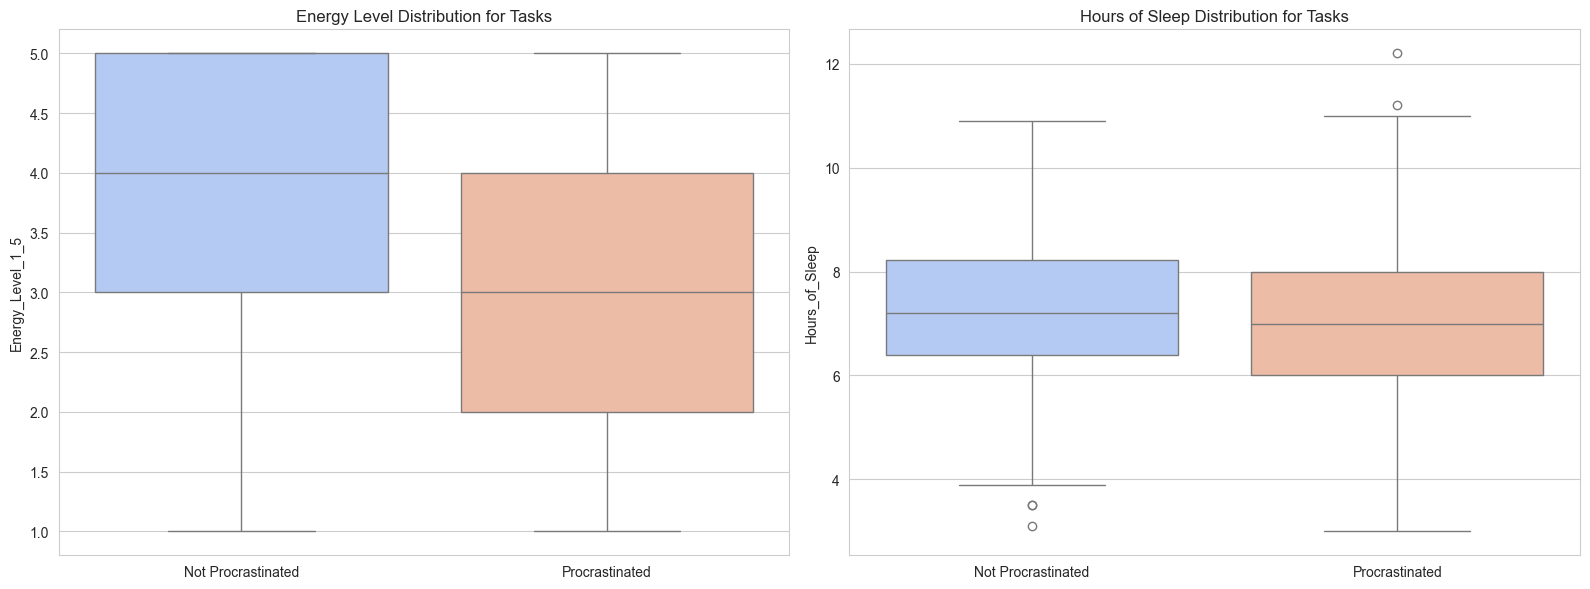

In [10]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Energy Level vs. Procrastination
sns.boxplot(data=df, x='Procrastinated', y='Energy_Level_1_5', ax=ax[0], palette='coolwarm')
ax[0].set_title('Energy Level Distribution for Tasks')
ax[0].set_xticklabels(['Not Procrastinated', 'Procrastinated'])
ax[0].set_xlabel('')

# Plot 2: Hours of Sleep vs. Procrastination
sns.boxplot(data=df, x='Procrastinated', y='Hours_of_Sleep', ax=ax[1], palette='coolwarm')
ax[1].set_title('Hours of Sleep Distribution for Tasks')
ax[1].set_xticklabels(['Not Procrastinated', 'Procrastinated'])
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Define the target variable
y = df['Procrastinated']

# Select the features for the model
# We exclude the target, the reason for the target (Delay_Minutes), and non-numeric/ID columns
features_to_include = [
    'Estimated_Duration_Mins', 'Mood_Level_1_5', 'Energy_Level_1_5', 
    'Hours_of_Sleep', 'Perceived_Enjoyment_1_5', 'Day_of_Week', 
    'Hour_of_Day', 'Deadline_Proximity_Days', 'Task_Category'
]
X_raw = df[features_to_include]

# One-hot encode the 'Task_Category' column
X = pd.get_dummies(X_raw, columns=['Task_Category'], drop_first=True)

# Display the final features
print("Final features for the model (X):")
print(X.head())

Final features for the model (X):
   Estimated_Duration_Mins  Mood_Level_1_5  Energy_Level_1_5  Hours_of_Sleep  \
0                       10               1                 3             7.6   
1                       10               3                 3             7.0   
2                      103               2                 2             3.8   
3                      103               1                 2             8.8   
4                       44               3                 4             7.6   

   Perceived_Enjoyment_1_5  Day_of_Week  Hour_of_Day  Deadline_Proximity_Days  \
0                        1            3           11                       17   
1                        1            3           14                       29   
2                        3            3           16                       10   
3                        3            3           22                       12   
4                        1            4            1                       18   

In [12]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 1600 samples
Testing set size: 400 samples



--- Logistic Regression Results ---
              precision    recall  f1-score   support

           0       0.62      0.47      0.53        49
           1       0.93      0.96      0.94       351

    accuracy                           0.90       400
   macro avg       0.77      0.71      0.74       400
weighted avg       0.89      0.90      0.89       400



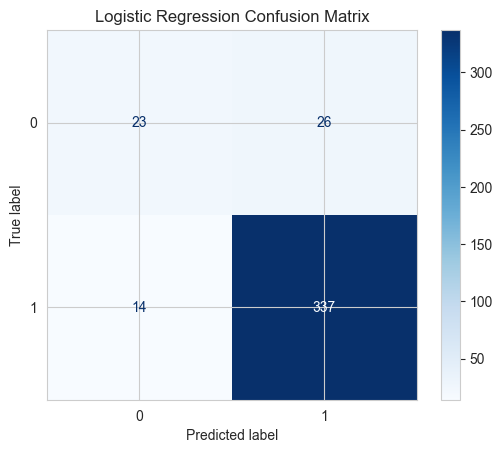

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_log))

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


--- Random Forest Results ---
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       0.97      0.99      0.98       351

    accuracy                           0.96       400
   macro avg       0.93      0.90      0.92       400
weighted avg       0.96      0.96      0.96       400



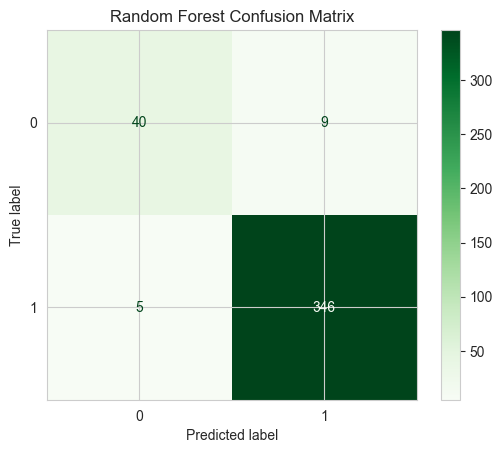

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("\n--- Random Forest Results ---")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

C:\Users\shett\AppData\Local\Temp\ipykernel_11212\1307460629.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


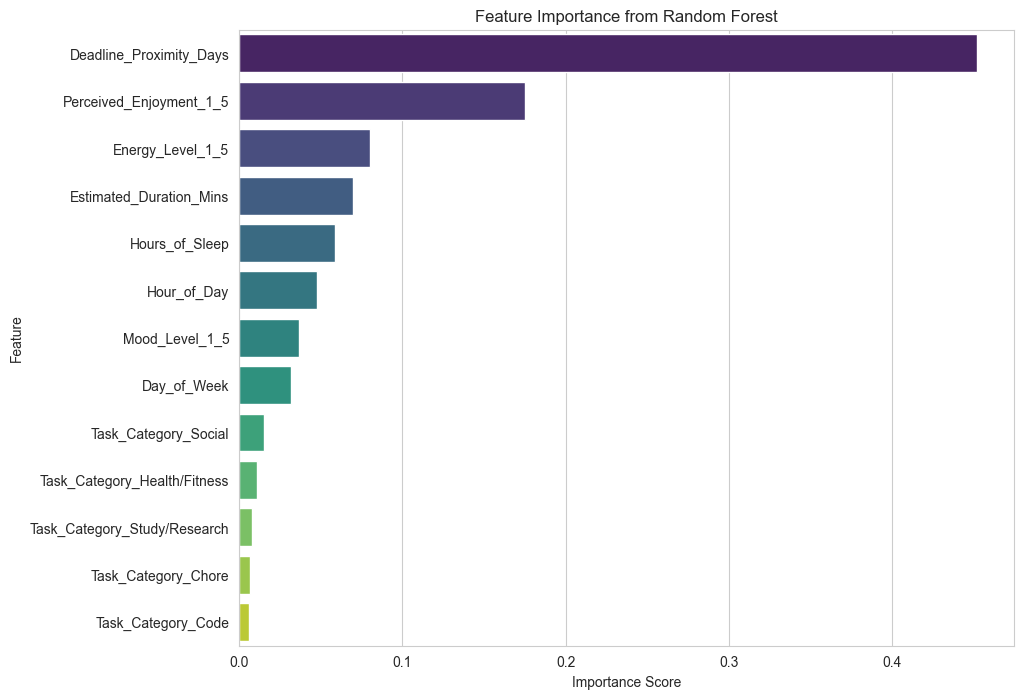


Top 5 Most Important Features:
                   feature  importance
7  Deadline_Proximity_Days    0.451849
4  Perceived_Enjoyment_1_5    0.175393
2         Energy_Level_1_5    0.080049
0  Estimated_Duration_Mins    0.069773
3           Hours_of_Sleep    0.058921


In [15]:
# Get feature importances from the Random Forest model
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_df.head())

In [16]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Original training set shape: Counter({1: 1405, 0: 195})
Resampled training set shape: Counter({1: 1405, 0: 1405})

--- SMOTE Random Forest Results ---
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        49
           1       0.99      0.95      0.97       351

    accuracy                           0.95       400
   macro avg       0.86      0.95      0.90       400
weighted avg       0.96      0.95      0.95       400



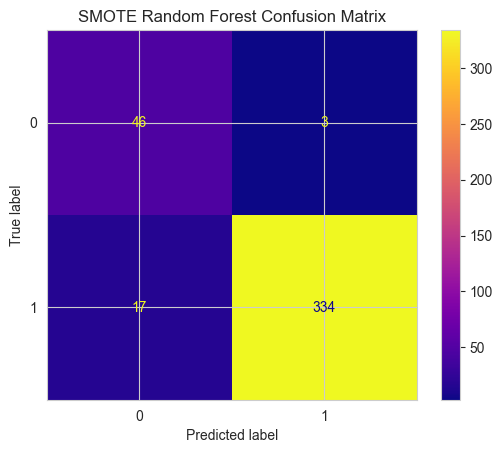

In [17]:
import numpy
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Initialize SMOTE
smote = SMOTE(random_state=42)

# 2. Apply SMOTE only to the training data
print(f"Original training set shape: {Counter(y_train)}")
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Resampled training set shape: {Counter(y_train_smote)}")

# 3. Train a new Random Forest on the SMOTE-balanced data
# (We don't need class_weight='balanced' anymore)
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# 4. Evaluate the SMOTE model on the original, unbalanced test set
y_pred_smote = rf_smote.predict(X_test)

print("\n--- SMOTE Random Forest Results ---")
print(classification_report(y_test, y_pred_smote))

ConfusionMatrixDisplay.from_estimator(rf_smote, X_test, y_test, cmap='plasma')
plt.title('SMOTE Random Forest Confusion Matrix')
plt.show()

In [22]:
import streamlit as st
import pandas as pd
import joblib
from datetime import datetime

# --- Load Model and Columns ---
try:
    model = joblib.load('procrastination_model.joblib')
    model_columns = joblib.load('model_columns.joblib')
except FileNotFoundError:
    st.error("Model files not found! Please run `train_and_save_model.py` first.")
    st.stop()

# --- App Structure ---
st.set_page_config(page_title="Procrastination Predictor", page_icon="🤔")

st.title("🤔 The Procrastination Predictor")
st.markdown("Enter the details of your task and your current state to predict the likelihood of procrastinating.")

# --- Sidebar for User Inputs ---
st.sidebar.header("Enter Task Details")

# Define task categories based on the original data generator
task_categories = ['Code', 'Study/Research', 'Chore', 'Admin/Emails', 'Health/Fitness', 'Social']
task_category = st.sidebar.selectbox("Task Category", options=task_categories)

est_duration = st.sidebar.number_input("Estimated Duration (minutes)", min_value=5, max_value=360, value=60, step=5)
deadline_date = st.sidebar.date_input("Task Deadline")

st.sidebar.header("Enter Your Current State")
mood_level = st.sidebar.slider("Mood Level (1=Low, 5=High)", 1, 5, 3)
energy_level = st.sidebar.slider("Energy Level (1=Low, 5=High)", 1, 5, 3)
hours_of_sleep = st.sidebar.number_input("Hours of Sleep Last Night", min_value=0.0, max_value=16.0, value=7.0, step=0.5)
perceived_enjoyment = st.sidebar.slider("Perceived Enjoyment (1=Dread it, 5=Love it)", 1, 5, 3)


# --- Prediction Logic ---
if st.sidebar.button("Predict Procrastination Risk"):

    # 1. Get current time information
    now = datetime.now()
    day_of_week = now.weekday()  # Monday is 0, Sunday is 6
    hour_of_day = now.hour
    
    # 2. Calculate deadline proximity
    deadline_datetime = datetime.combine(deadline_date, datetime.min.time())
    deadline_proximity = (deadline_datetime - now).days

    # 3. Create a DataFrame from the inputs
    input_data = {
        'Estimated_Duration_Mins': [est_duration],
        'Mood_Level_1_5': [mood_level],
        'Energy_Level_1_5': [energy_level],
        'Hours_of_Sleep': [hours_of_sleep],
        'Perceived_Enjoyment_1_5': [perceived_enjoyment],
        'Day_of_Week': [day_of_week],
        'Hour_of_Day': [hour_of_day],
        'Deadline_Proximity_Days': [deadline_proximity],
        'Task_Category': [task_category] # Keep as category for one-hot encoding
    }
    input_df_raw = pd.DataFrame(input_data)

    # 4. One-Hot Encode the input data to match the model's training format
    input_df_encoded = pd.get_dummies(input_df_raw)
    
    # 5. Align columns with the model's training columns
    # This is a crucial step to ensure the prediction works correctly
    final_df = pd.DataFrame(columns=model_columns)
    final_df = pd.concat([final_df, input_df_encoded])
    final_df = final_df.fillna(0) # Fill any missing columns with 0
    final_df = final_df[model_columns] # Ensure column order is identical

    # 6. Make prediction
    prediction = model.predict(final_df)[0]
    prediction_proba = model.predict_proba(final_df)[0]

    # --- Display Results ---
    st.header("Prediction Result")

    if prediction == 1:
        st.error("🚨 High Risk of Procrastination")
        st.write(f"The model predicts a **{prediction_proba[1]*100:.2f}% probability** that you will delay this task.")
        st.markdown("#### Suggestions:")
        st.markdown("- **Break it down:** Can you split this task into smaller, 15-minute actions?")
        st.markdown("- **Just 5 minutes:** Commit to working on it for just five minutes. You might find it easier to continue once you start.")
        st.markdown("- **Change your environment:** Move to a different location, like a library or coffee shop.")
    else:
        st.success("✅ Low Risk - You're likely to start on time!")
        st.write(f"The model predicts a **{prediction_proba[0]*100:.2f}% probability** that you will get this done without delay.")
        st.balloons()
        st.markdown("#### Great job! Seize the momentum and get started.")


2025-09-19 12:23:01.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.747 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-19 12:23:01.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [19]:
pip install streamlit

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 1.5 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/10.0 MB 2.0 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/10.0 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/10.0 MB 2.0 MB/s eta 0:00:05
   -------- -------------------

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

print("Starting model training process...")

# --- 1. Load Data ---
try:
    df = pd.read_csv('procrastination_big_data_v2.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'procrastination_big_data_v2.csv' not found.")
    print("Please run the data generation script first.")
    exit()

# --- 2. Feature Engineering ---
# Convert date/time columns to datetime objects
df['Actual_Start_Time'] = pd.to_datetime(df['Actual_Start_Time'])
df['Planned_Start_Time'] = pd.to_datetime(df['Planned_Start_Time'])
df['Deadline_Date'] = pd.to_datetime(df['Deadline_Date'])

# Create the target variable
df['Delay_Minutes'] = (df['Actual_Start_Time'] - df['Planned_Start_Time']).dt.total_seconds() / 60
df['Procrastinated'] = (df['Delay_Minutes'] > 30).astype(int)

# Create time-based & deadline features
df['Day_of_Week'] = df['Actual_Start_Time'].dt.dayofweek
df['Hour_of_Day'] = df['Actual_Start_Time'].dt.hour
df['Deadline_Proximity_Days'] = (df['Deadline_Date'] - df['Actual_Start_Time']).dt.days

print("Feature engineering complete.")

# --- 3. Prepare Data for Modeling ---
y = df['Procrastinated']
features_to_include = [
    'Estimated_Duration_Mins', 'Mood_Level_1_5', 'Energy_Level_1_5', 
    'Hours_of_Sleep', 'Perceived_Enjoyment_1_5', 'Day_of_Week', 
    'Hour_of_Day', 'Deadline_Proximity_Days', 'Task_Category'
]
X_raw = df[features_to_include]
X = pd.get_dummies(X_raw, columns=['Task_Category'], drop_first=True)

# --- 4. Handle Class Imbalance with SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("SMOTE applied to balance the dataset.")

# --- 5. Train the Final Model ---
# We use the full, resampled dataset for the final production model
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_resampled, y_resampled)
print("Final Random Forest model trained successfully.")

# --- 6. Save the Model and Columns ---
# Save the trained model
joblib.dump(final_model, 'procrastination_model.joblib')

# Save the list of columns the model was trained on
joblib.dump(X.columns.tolist(), 'model_columns.joblib')

print("\nModel and column list have been saved to disk:")
print("- procrastination_model.joblib")
print("- model_columns.joblib")


Starting model training process...
Dataset loaded successfully.
Feature engineering complete.
SMOTE applied to balance the dataset.
Final Random Forest model trained successfully.

Model and column list have been saved to disk:
- procrastination_model.joblib
- model_columns.joblib
